<a href="https://colab.research.google.com/github/HariiAravinth/Diabetes_Prediction_Dissertation/blob/main/Revised_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()  # Select your `diabetes.csv` file when prompted


Saving diabetes.csv to diabetes (4).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
def load_and_prepare_dataset(filepath):
    df = pd.read_csv(filepath)

    # Rename columns for consistency
    df = df.rename(columns={
        "Pregnancies": "pregnancies",
        "Glucose": "glucose",
        "BloodPressure": "blood pressure",
        "SkinThickness": "skinthickness",
        "Insulin": "insulin",
        "BMI": "BMI",
        "DiabetesPedigreeFunction": "dpf",
        "Age": "age"
    })

    return df

In [ ]:
# Load dataset
df = load_and_prepare_dataset("/content/diabetes.csv")


# EDA and PreProcessing

In [ ]:
df.head()

,pregnancies,glucose,blood pressure,skinthickness,insulin,BMI,dpf,age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Step 1.3.1: General dataset info
print("Dataset Info:")
print(df.info())

print("\nDataset Shape:", df.shape)
print("\nSummary Statistics:")
display(df.describe())

# Step 1.3.2: Detect duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\n🔁 Number of duplicate rows: {duplicate_rows.shape[0]}")

if not duplicate_rows.empty:
    print("\nSample duplicate rows:")
    display(duplicate_rows.head())

# Step 1.3.3: Check for missing values and suspicious zeros
print("\nMissing values per column:")
print(df.isnull().sum())

# Define columns where 0 is considered biologically implausible
zero_suspect_cols = ['glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI']

print("\n🔍 Number of zeros in key medical columns (to be treated as missing):")
for col in zero_suspect_cols:
    print(f"{col}: {(df[col] == 0).sum()}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnancies     768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood pressure  768 non-null    int64  
 3   skinthickness   768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   dpf             768 non-null    float64
 7   age             768 non-null    int64  
 8   Outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Dataset Shape: (768, 9)

Summary Statistics:


,pregnancies,glucose,blood pressure,skinthickness,insulin,BMI,dpf,age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



🔁 Number of duplicate rows: 0

Missing values per column:
pregnancies       0
glucose           0
blood pressure    0
skinthickness     0
insulin           0
BMI               0
dpf               0
age               0
Outcome           0
dtype: int64

🔍 Number of zeros in key medical columns (to be treated as missing):
glucose: 5
blood pressure: 35
skinthickness: 227
insulin: 374
BMI: 11


# Checking for zeroes and replacing with NAN

In [ ]:
import numpy as np
import pandas as pd

# Make a fresh copy from the original
df_raw = df.copy()

# Define invalid columns (0 is not valid)
invalid_zero_cols = ['glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI']
df_raw[invalid_zero_cols] = df_raw[invalid_zero_cols].replace(0, np.nan)

# Confirm missing values exist
print("🔍 Missing values after 0 → NaN:")
print(df_raw[invalid_zero_cols].isnull().sum())


🔍 Missing values after 0 → NaN:
glucose             5
blood pressure     35
skinthickness     227
insulin           374
BMI                11
dtype: int64


# Correlation Heat Map

/tmp/ipython-input-2412634301.py:8: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


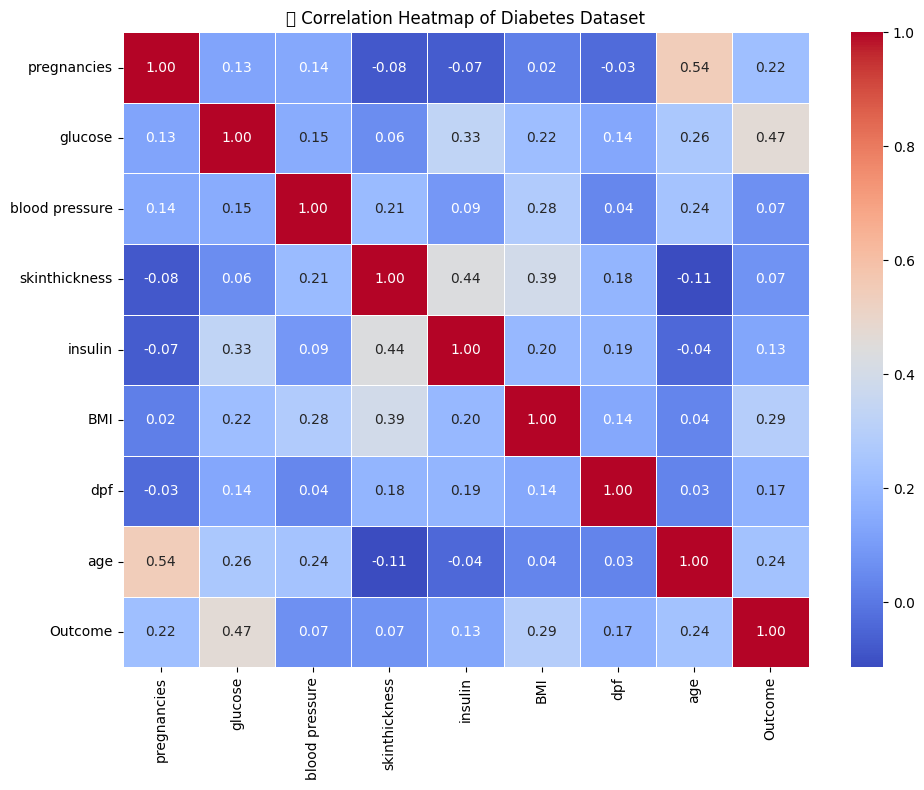

In [ ]:
# Correlation matrix for all numeric features
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Heatmap of Diabetes Dataset")
plt.tight_layout()
plt.show()


# Box Plots

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


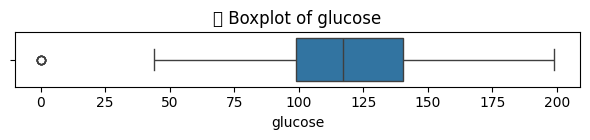

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


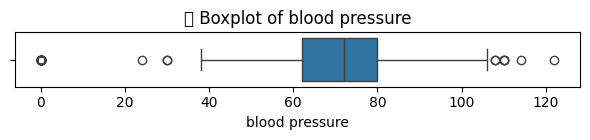

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


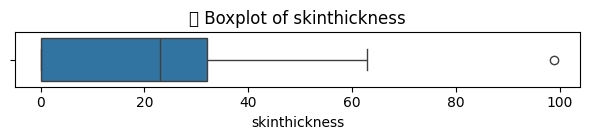

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


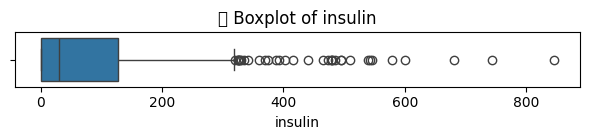

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


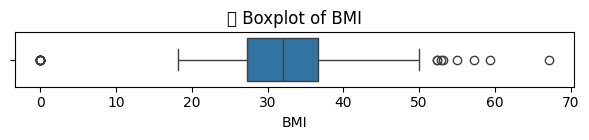

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


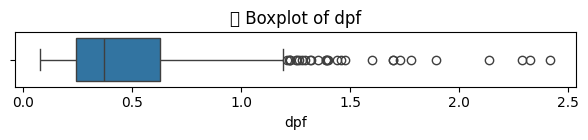

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


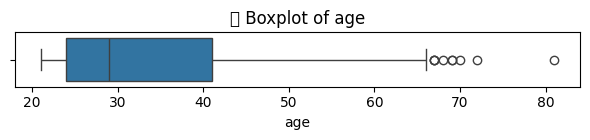

In [ ]:
# Select features to plot
features_to_check = ['glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI', 'dpf', 'age']

# Plot boxplots for each
for col in features_to_check:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"📦 Boxplot of {col}")
    plt.tight_layout()
    plt.show()


# Applying Simple Imputer

In [ ]:
from sklearn.impute import SimpleImputer

# Make a fresh copy
df_median = df_raw.copy()

# Apply median imputation
median_imputer = SimpleImputer(strategy='median')
df_median[invalid_zero_cols] = median_imputer.fit_transform(df_median[invalid_zero_cols])

# Sanity check
print("✅ Median-imputed dataset:")
print(df_median.isnull().sum())


✅ Median-imputed dataset:
pregnancies       0
glucose           0
blood pressure    0
skinthickness     0
insulin           0
BMI               0
dpf               0
age               0
Outcome           0
dtype: int64


# Implementing Fair Cut Imputer

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

def faircut_impute_verbose(df, strategy="mean", max_depth=5, reduce_to_6=True, target_col="Outcome"):
    df_imputed = df.copy()
    numeric_cols = df_imputed.select_dtypes(include=np.number).columns.drop(target_col)

    tree_imputed_count = 0
    fallback_count = 0

    for col in numeric_cols:
        if df_imputed[col].isnull().sum() == 0:
            continue

        train_data = df_imputed[df_imputed[col].notnull()]
        missing_data = df_imputed[df_imputed[col].isnull()]

        if len(missing_data) == 0 or len(train_data) < 10:
            df_imputed[col].fillna(df_imputed[col].median(), inplace=True)
            fallback_count += 1
            continue

        try:
            X_train = train_data.drop(columns=[col, target_col])
            y_train = train_data[col]

            if X_train.isnull().sum().sum() > 0:
                X_train = SimpleImputer(strategy=strategy).fit_transform(X_train)

            tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
            tree.fit(X_train, y_train)

            X_missing = missing_data.drop(columns=[col, target_col])
            if X_missing.isnull().sum().sum() > 0:
                X_missing = SimpleImputer(strategy=strategy).fit_transform(X_missing)

            imputed_values = tree.predict(X_missing)
            df_imputed.loc[df_imputed[col].isnull(), col] = imputed_values
            tree_imputed_count += 1

        except Exception as e:
            df_imputed[col].fillna(df_imputed[col].median(), inplace=True)
            fallback_count += 1
            print(f"[Fallback on {col}] Reason: {e}")

    print(f"\n🌲 Tree-based imputations: {tree_imputed_count}")
    print(f"📉 Median fallback imputations: {fallback_count}")

    if reduce_to_6:
        keep_cols = ['glucose', 'BMI', 'age', 'pregnancies', 'blood pressure', 'dpf']
        if all(col in df_imputed.columns for col in keep_cols):
            df_imputed = df_imputed[keep_cols + [target_col]]
        else:
            print("⚠️ Warning: Some selected columns not found — skipping reduction.")

    return df_imputed


In [ ]:
df_faircut = faircut_impute_verbose(df_raw)


[Fallback on blood pressure] Reason: X has 6 features, but DecisionTreeRegressor is expecting 7 features as input.
[Fallback on skinthickness] Reason: X has 6 features, but DecisionTreeRegressor is expecting 7 features as input.

🌲 Tree-based imputations: 3
📉 Median fallback imputations: 2


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['insulin']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/tmp/ipython-input-1315561383.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df_imputed[col].median(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['insulin']. At leas

# Defining Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# === 1. Median-Imputed Dataset ===
X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42  # Ensure reproducibility
)

# === 2. FairCutTree-Imputed Dataset ===
Xf = df_faircut.drop(columns='Outcome')
yf = df_faircut['Outcome']

Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    Xf, yf,
    test_size=0.2,
    stratify=yf,
    random_state=42  # Same for consistency
)


# Standard Scaler for both Imputed Data sets

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# === 1. Scale the full feature dataset (df) ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 2. Apply SMOTE on training set only ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("✅ SMOTE applied on median-imputed dataset")
print(f"Resampled train shape: {X_train_res.shape}")
print(f"Original test shape  : {X_test_scaled.shape}")


# === 3. Scale the FairCutTree-imputed dataset ===
scaler_faircut = StandardScaler()
Xf_train_scaled = scaler_faircut.fit_transform(Xf_train)
Xf_test_scaled = scaler_faircut.transform(Xf_test)

# === 4. Apply SMOTE on FairCutTree training set ===
Xf_train_res, yf_train_res = smote.fit_resample(Xf_train_scaled, yf_train)

print("\n✅ SMOTE applied on FairCutTree-imputed dataset")
print(f"Resampled train shape: {Xf_train_res.shape}")
print(f"Original test shape  : {Xf_test_scaled.shape}")


✅ SMOTE applied on median-imputed dataset
Resampled train shape: (800, 8)
Original test shape  : (154, 8)

✅ SMOTE applied on FairCutTree-imputed dataset
Resampled train shape: (800, 6)
Original test shape  : (154, 6)


# Evaliuation Metrics

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def false_negative_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fn = cm[1][0]
    tp = cm[1][1]
    return fn / (fn + tp) if (fn + tp) > 0 else 0

def false_positive_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fp = cm[0][1]
    tn = cm[0][0]
    return fp / (fp + tn) if (fp + tn) > 0 else 0

def balanced_error_rate(y_true, y_pred):
    fnr = false_negative_rate(y_true, y_pred)
    fpr = false_positive_rate(y_true, y_pred)
    return 0.5 * (fnr + fpr)

def evaluate_model(y_true, y_pred, y_proba, model_name="Model"):
    print(f"\n=== 🔍 Evaluation for: {model_name} ===\n")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    # Metrics
    print("🔢 Classification Report:")
    print(classification_report(y_true, y_pred))

    print("📊 Key Metrics:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC:   {auc_score:.4f}")

    # Fairness metrics
    fnr = false_negative_rate(y_true, y_pred)
    fprate = false_positive_rate(y_true, y_pred)
    ber = balanced_error_rate(y_true, y_pred)

    print("\n⚖️ Fairness Metrics:")
    print(f"False Negative Rate (FNR): {fnr:.4f}")
    print(f"False Positive Rate (FPR): {fprate:.4f}")
    print(f"Balanced Error Rate (BER): {ber:.4f}")


# Logistic Regression


=== 🔍 Evaluation for: Logistic Regression (Median Before SMOTE) ===



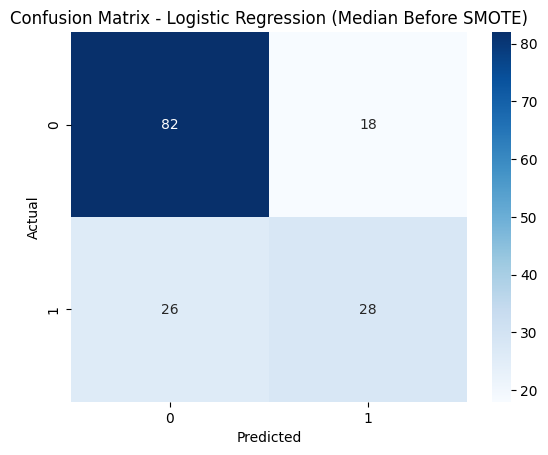

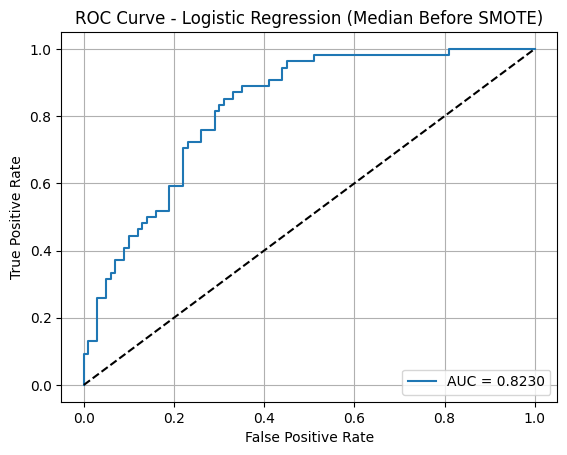

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

📊 Key Metrics:
Accuracy:  0.7143
Precision: 0.6087
Recall:    0.5185
F1 Score:  0.5600
ROC AUC:   0.8230

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4815
False Positive Rate (FPR): 0.1800
Balanced Error Rate (BER): 0.3307

=== 🔍 Evaluation for: Logistic Regression (Median After SMOTE) ===



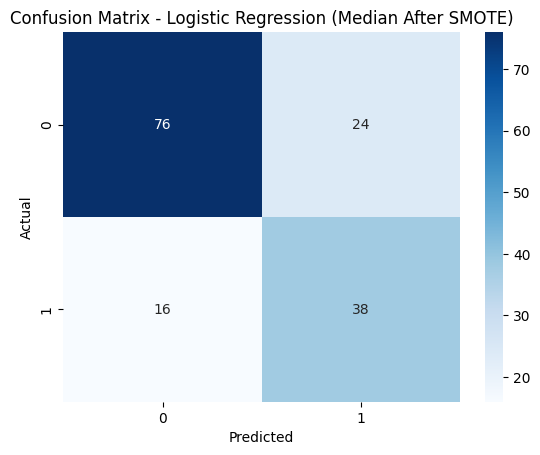

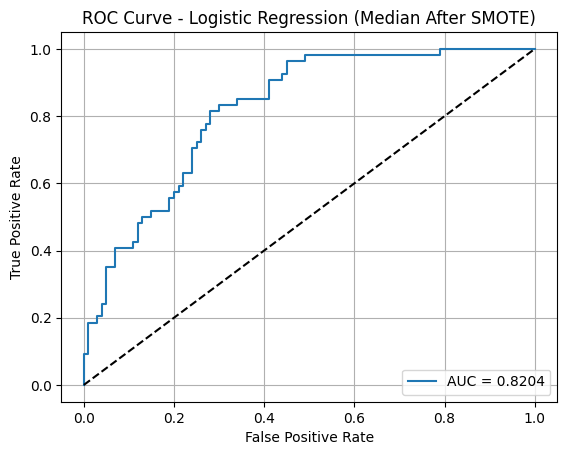

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

📊 Key Metrics:
Accuracy:  0.7403
Precision: 0.6129
Recall:    0.7037
F1 Score:  0.6552
ROC AUC:   0.8204

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2963
False Positive Rate (FPR): 0.2400
Balanced Error Rate (BER): 0.2681


In [ ]:
from sklearn.linear_model import LogisticRegression

# === Median Imputation: Before SMOTE ===
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_logreg, y_proba_logreg, model_name="Logistic Regression (Median Before SMOTE)")

# === Median Imputation: After SMOTE ===
logreg_smote = LogisticRegression(max_iter=1000, random_state=42)
logreg_smote.fit(X_train_res, y_train_res)

y_pred_logreg_smote = logreg_smote.predict(X_test_scaled)
y_proba_logreg_smote = logreg_smote.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_logreg_smote, y_proba_logreg_smote, model_name="Logistic Regression (Median After SMOTE)")



=== 🔍 Evaluation for: Logistic Regression (FairCut Before SMOTE) ===



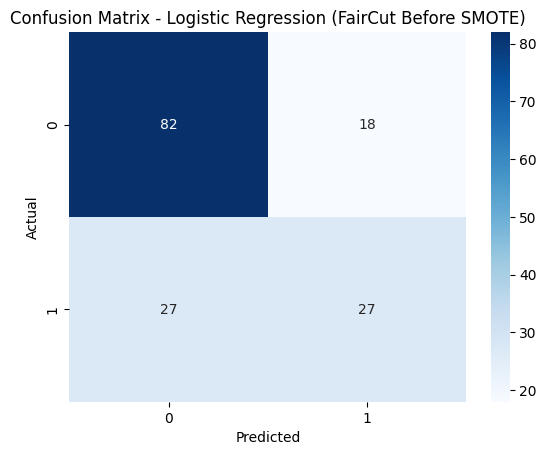

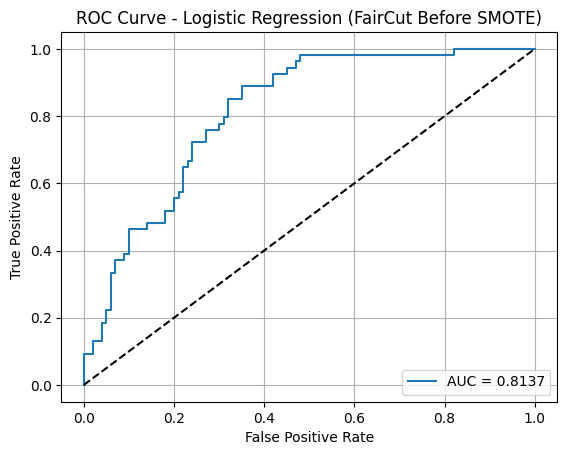

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

📊 Key Metrics:
Accuracy:  0.7078
Precision: 0.6000
Recall:    0.5000
F1 Score:  0.5455
ROC AUC:   0.8137

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.5000
False Positive Rate (FPR): 0.1800
Balanced Error Rate (BER): 0.3400

=== 🔍 Evaluation for: Logistic Regression (FairCut After SMOTE) ===



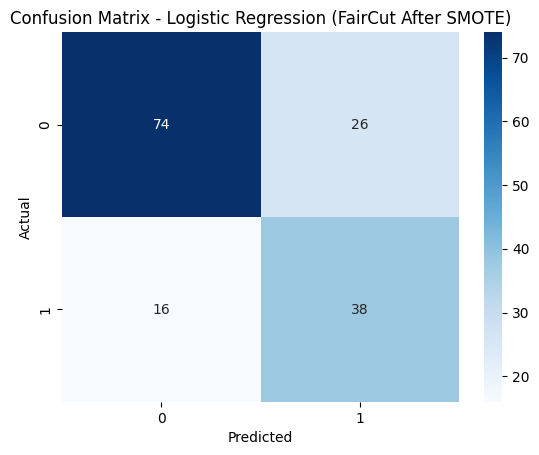

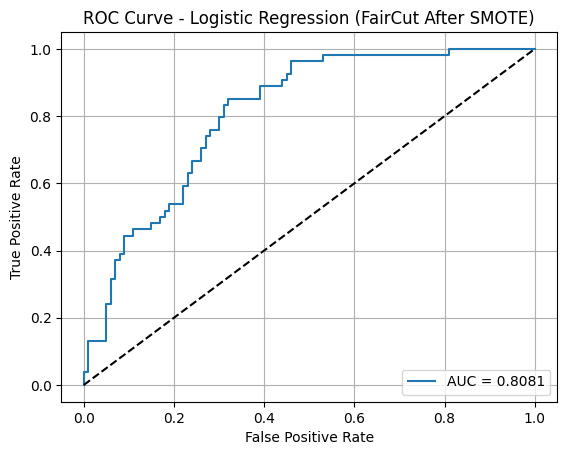

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       100
           1       0.59      0.70      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154

📊 Key Metrics:
Accuracy:  0.7273
Precision: 0.5938
Recall:    0.7037
F1 Score:  0.6441
ROC AUC:   0.8081

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2963
False Positive Rate (FPR): 0.2600
Balanced Error Rate (BER): 0.2781


In [ ]:
from sklearn.linear_model import LogisticRegression

# === FairCut: Before SMOTE ===
logreg_fc = LogisticRegression(max_iter=1000, random_state=42)
logreg_fc.fit(Xf_train_scaled, yf_train)

yf_pred_fc = logreg_fc.predict(Xf_test_scaled)
yf_proba_fc = logreg_fc.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_fc, yf_proba_fc, model_name="Logistic Regression (FairCut Before SMOTE)")

# === FairCut: After SMOTE ===
logreg_fc_smote = LogisticRegression(max_iter=1000, random_state=42)
logreg_fc_smote.fit(Xf_train_res, yf_train_res)

yf_pred_fc_smote = logreg_fc_smote.predict(Xf_test_scaled)
yf_proba_fc_smote = logreg_fc_smote.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_fc_smote, yf_proba_fc_smote, model_name="Logistic Regression (FairCut After SMOTE)")


✅ Best Parameters (Before SMOTE): {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

=== 🔍 Evaluation for: Logistic Regression (Tuned Before SMOTE) ===



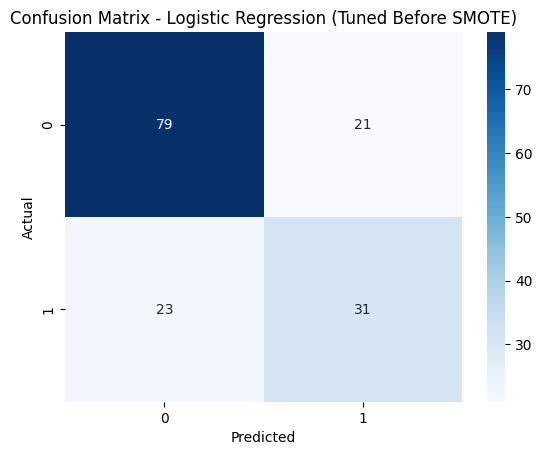

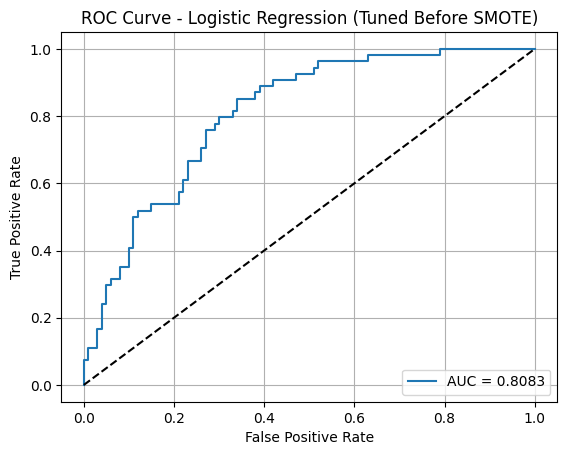

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.60      0.57      0.58        54

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154

📊 Key Metrics:
Accuracy:  0.7143
Precision: 0.5962
Recall:    0.5741
F1 Score:  0.5849
ROC AUC:   0.8083

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4259
False Positive Rate (FPR): 0.2100
Balanced Error Rate (BER): 0.3180


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

# === Grid Search: Before SMOTE ===
logreg_gs = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid=logreg_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
logreg_gs.fit(X_train_scaled, y_train)

print("✅ Best Parameters (Before SMOTE):", logreg_gs.best_params_)

# Evaluate best estimator
logreg_best = logreg_gs.best_estimator_
y_pred_gs = logreg_best.predict(X_test_scaled)
y_proba_gs = logreg_best.predict_proba(X_test_scaled)[:, 1]
evaluate_model(y_test, y_pred_gs, y_proba_gs, model_name="Logistic Regression (Tuned Before SMOTE)")


✅ Best Parameters (After SMOTE): {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

=== 🔍 Evaluation for: Logistic Regression (Tuned After SMOTE) ===



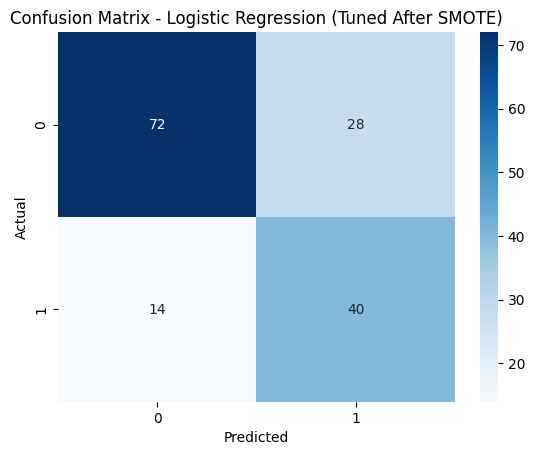

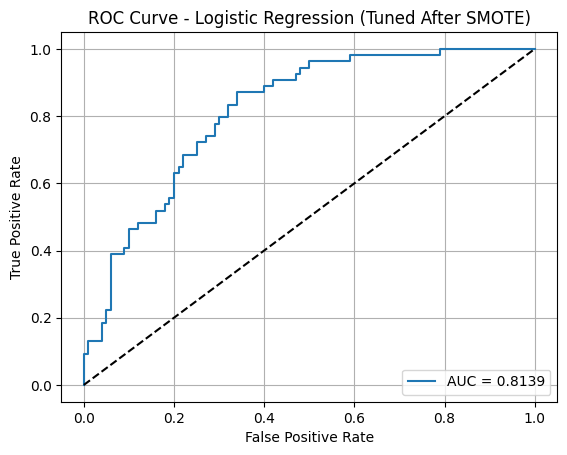

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       100
           1       0.59      0.74      0.66        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154

📊 Key Metrics:
Accuracy:  0.7273
Precision: 0.5882
Recall:    0.7407
F1 Score:  0.6557
ROC AUC:   0.8139

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2593
False Positive Rate (FPR): 0.2800
Balanced Error Rate (BER): 0.2696


In [ ]:
# === Grid Search: After SMOTE ===
logreg_smote_gs = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid=logreg_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
logreg_smote_gs.fit(X_train_res, y_train_res)

print("✅ Best Parameters (After SMOTE):", logreg_smote_gs.best_params_)

# Evaluate best estimator
logreg_best_smote = logreg_smote_gs.best_estimator_
y_pred_gs_smote = logreg_best_smote.predict(X_test_scaled)
y_proba_gs_smote = logreg_best_smote.predict_proba(X_test_scaled)[:, 1]
evaluate_model(y_test, y_pred_gs_smote, y_proba_gs_smote, model_name="Logistic Regression (Tuned After SMOTE)")


# Top performing Model SHAP for Logistic Regression (FairCut + SMOTE)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


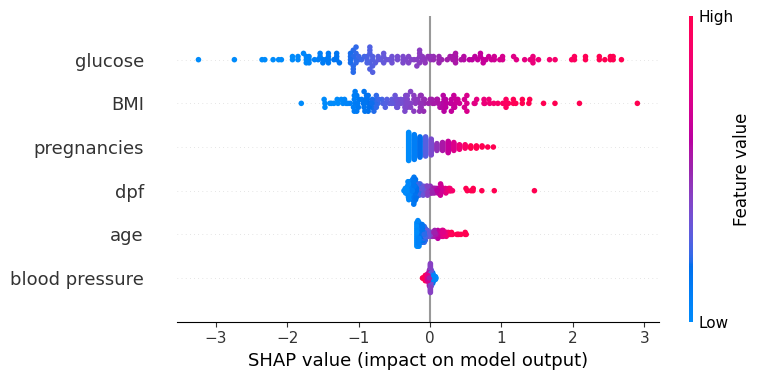

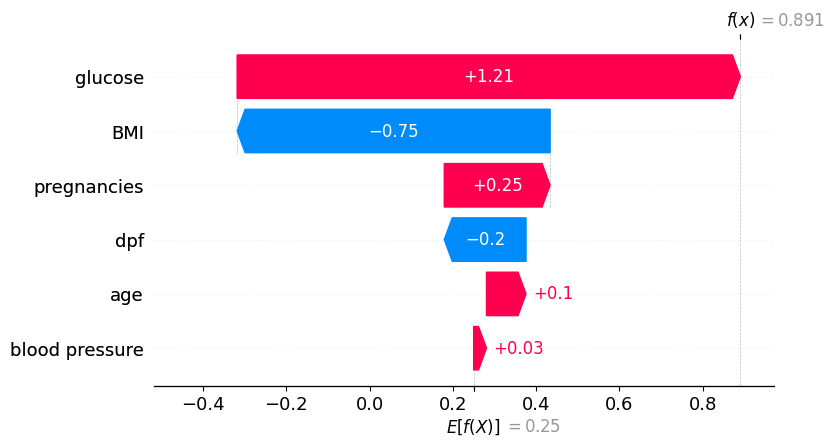

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP Explainer
explainer = shap.LinearExplainer(logreg_fc_smote, Xf_train_res, feature_perturbation="interventional")
shap_values = explainer.shap_values(Xf_test_scaled)

# Beeswarm Plot
shap.summary_plot(shap_values, Xf_test_scaled, feature_names=Xf.columns)

# Waterfall plot for one prediction
shap.initjs()
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names=Xf.columns)


# SVM


=== 🔍 Evaluation for: SVM (Median Before SMOTE) ===



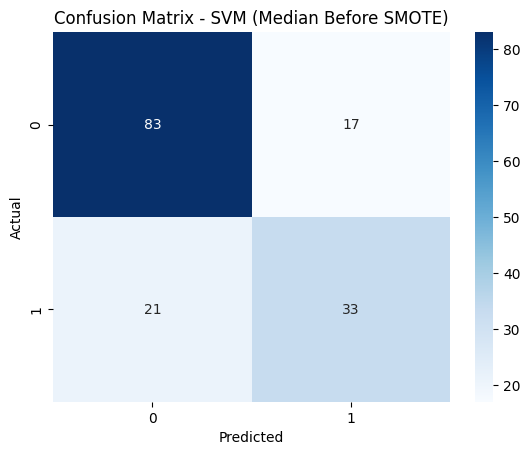

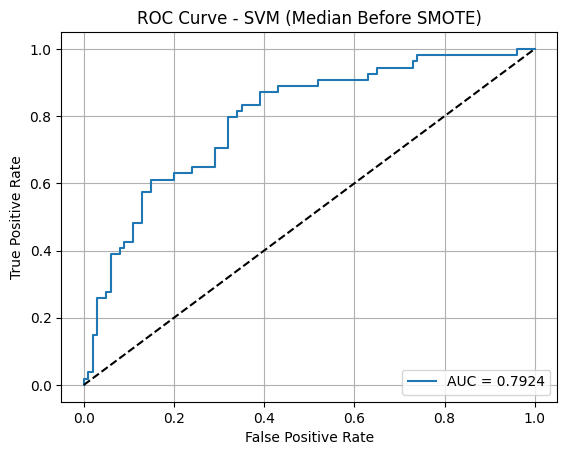

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

📊 Key Metrics:
Accuracy:  0.7532
Precision: 0.6600
Recall:    0.6111
F1 Score:  0.6346
ROC AUC:   0.7924

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3889
False Positive Rate (FPR): 0.1700
Balanced Error Rate (BER): 0.2794

=== 🔍 Evaluation for: SVM (Median After SMOTE) ===



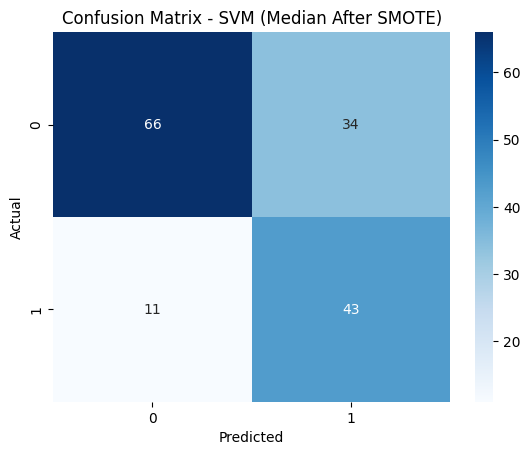

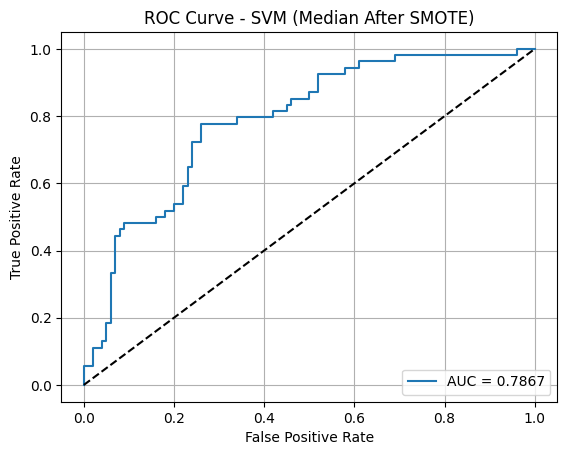

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       100
           1       0.56      0.80      0.66        54

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.70       154
weighted avg       0.75      0.71      0.71       154

📊 Key Metrics:
Accuracy:  0.7078
Precision: 0.5584
Recall:    0.7963
F1 Score:  0.6565
ROC AUC:   0.7867

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2037
False Positive Rate (FPR): 0.3400
Balanced Error Rate (BER): 0.2719


In [ ]:
from sklearn.svm import SVC

# === SVM: Median-Imputed (Before SMOTE) ===
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_svm, y_proba_svm, model_name="SVM (Median Before SMOTE)")

# === SVM: Median-Imputed (After SMOTE) ===
svm_smote = SVC(kernel='rbf', probability=True, random_state=42)
svm_smote.fit(X_train_res, y_train_res)

y_pred_svm_smote = svm_smote.predict(X_test_scaled)
y_proba_svm_smote = svm_smote.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_svm_smote, y_proba_svm_smote, model_name="SVM (Median After SMOTE)")



=== 🔍 Evaluation for: SVM (FairCut Before SMOTE) ===



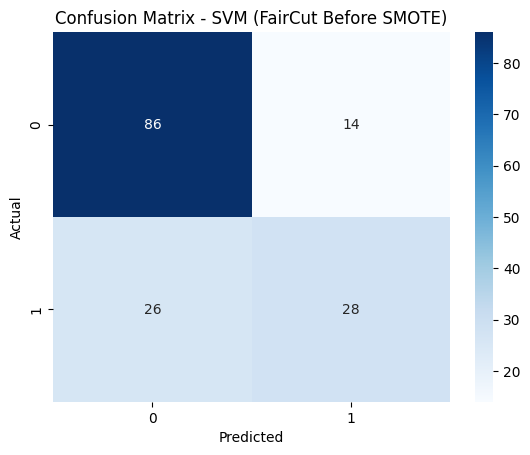

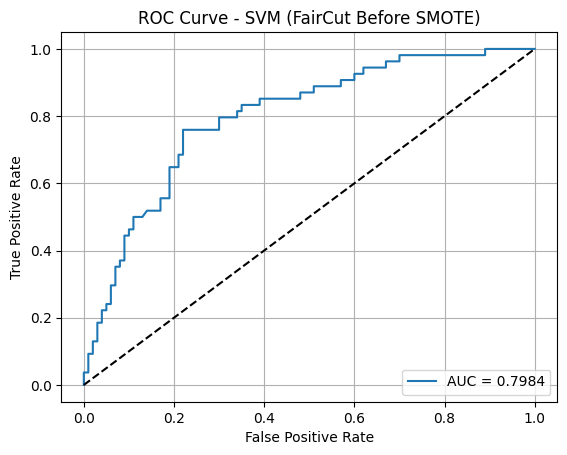

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154

📊 Key Metrics:
Accuracy:  0.7403
Precision: 0.6667
Recall:    0.5185
F1 Score:  0.5833
ROC AUC:   0.7984

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4815
False Positive Rate (FPR): 0.1400
Balanced Error Rate (BER): 0.3107

=== 🔍 Evaluation for: SVM (FairCut After SMOTE) ===



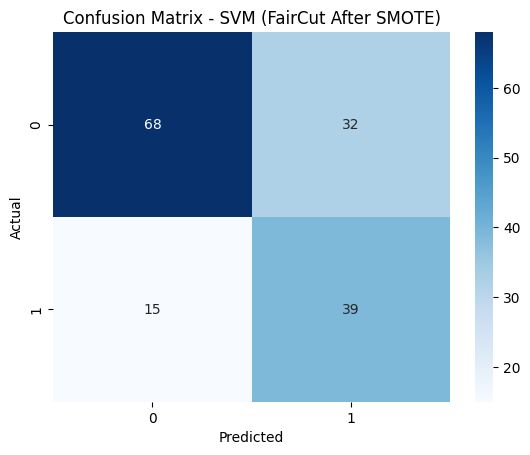

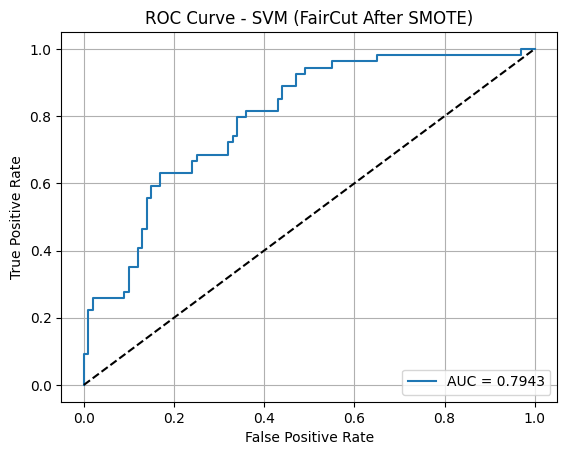

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       100
           1       0.55      0.72      0.62        54

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154

📊 Key Metrics:
Accuracy:  0.6948
Precision: 0.5493
Recall:    0.7222
F1 Score:  0.6240
ROC AUC:   0.7943

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2778
False Positive Rate (FPR): 0.3200
Balanced Error Rate (BER): 0.2989


In [ ]:
# === SVM: FairCut-Imputed (Before SMOTE) ===
svm_fc = SVC(kernel='rbf', probability=True, random_state=42)
svm_fc.fit(Xf_train_scaled, yf_train)

yf_pred_svm = svm_fc.predict(Xf_test_scaled)
yf_proba_svm = svm_fc.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_svm, yf_proba_svm, model_name="SVM (FairCut Before SMOTE)")

# === SVM: FairCut-Imputed (After SMOTE) ===
svm_fc_smote = SVC(kernel='rbf', probability=True, random_state=42)
svm_fc_smote.fit(Xf_train_res, yf_train_res)

yf_pred_svm_smote = svm_fc_smote.predict(Xf_test_scaled)
yf_proba_svm_smote = svm_fc_smote.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_svm_smote, yf_proba_svm_smote, model_name="SVM (FairCut After SMOTE)")


# KNN


=== 🔍 Evaluation for: KNN (Median Before SMOTE) ===



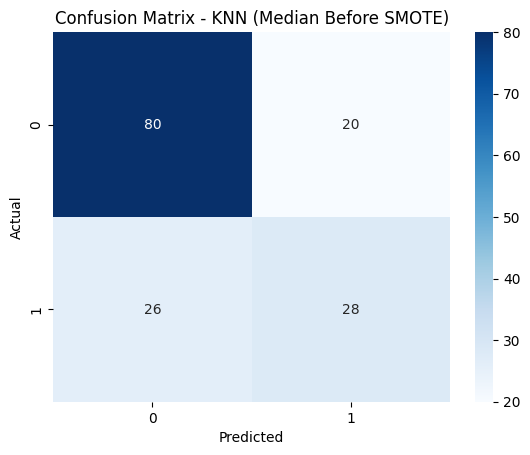

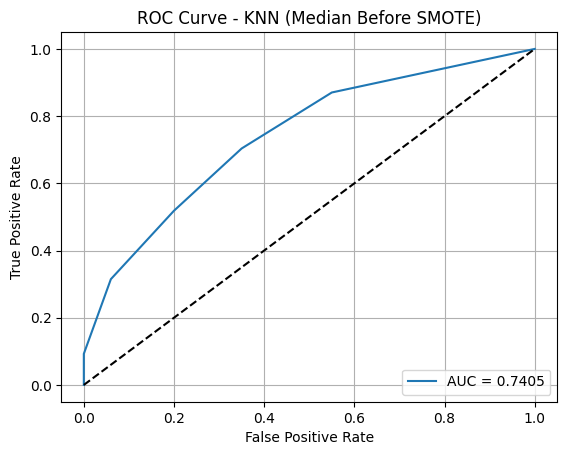

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

📊 Key Metrics:
Accuracy:  0.7013
Precision: 0.5833
Recall:    0.5185
F1 Score:  0.5490
ROC AUC:   0.7405

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4815
False Positive Rate (FPR): 0.2000
Balanced Error Rate (BER): 0.3407

=== 🔍 Evaluation for: KNN (Median After SMOTE) ===



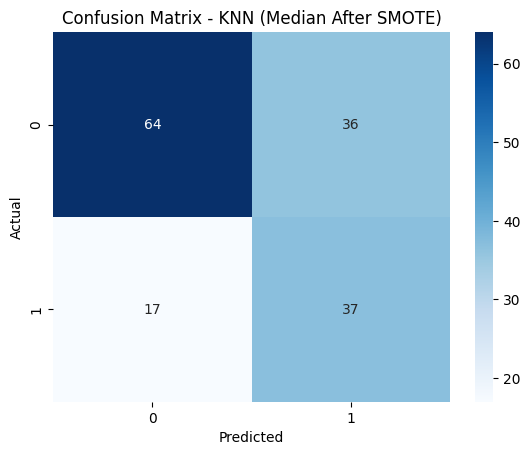

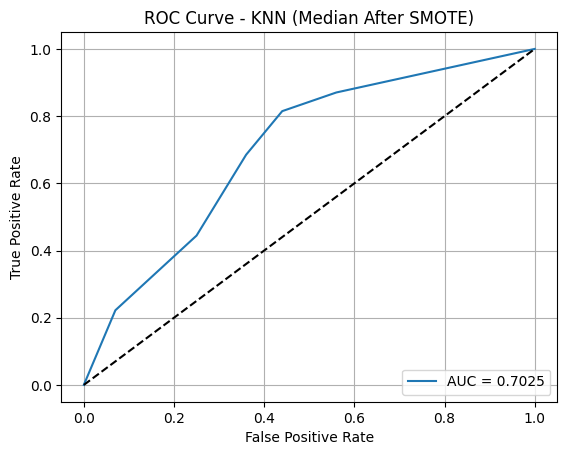

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       100
           1       0.51      0.69      0.58        54

    accuracy                           0.66       154
   macro avg       0.65      0.66      0.64       154
weighted avg       0.69      0.66      0.66       154

📊 Key Metrics:
Accuracy:  0.6558
Precision: 0.5068
Recall:    0.6852
F1 Score:  0.5827
ROC AUC:   0.7025

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3148
False Positive Rate (FPR): 0.3600
Balanced Error Rate (BER): 0.3374


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# === KNN: Median-Imputed (Before SMOTE) ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_knn, y_proba_knn, model_name="KNN (Median Before SMOTE)")

# === KNN: Median-Imputed (After SMOTE) ===
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_res, y_train_res)

y_pred_knn_smote = knn_smote.predict(X_test_scaled)
y_proba_knn_smote = knn_smote.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_knn_smote, y_proba_knn_smote, model_name="KNN (Median After SMOTE)")



=== 🔍 Evaluation for: KNN (FairCut Before SMOTE) ===



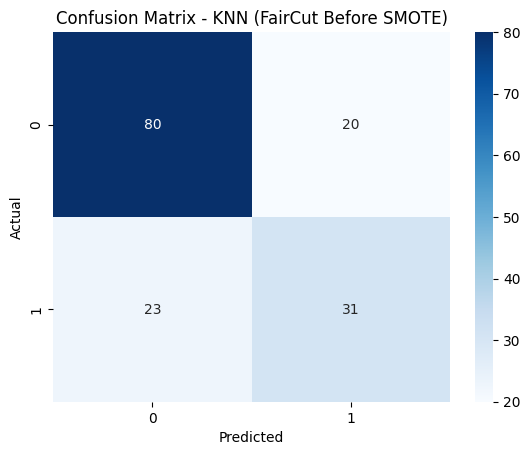

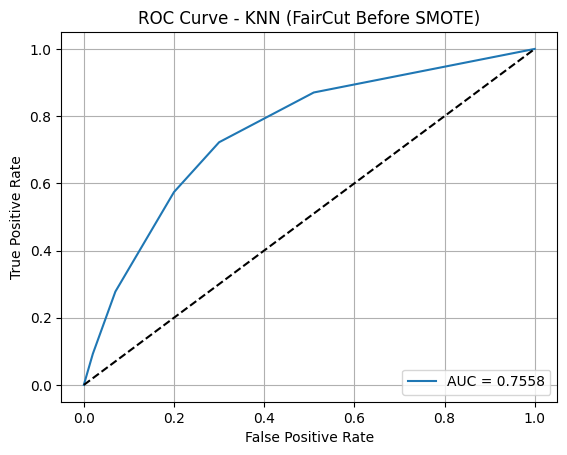

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.61      0.57      0.59        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154

📊 Key Metrics:
Accuracy:  0.7208
Precision: 0.6078
Recall:    0.5741
F1 Score:  0.5905
ROC AUC:   0.7558

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4259
False Positive Rate (FPR): 0.2000
Balanced Error Rate (BER): 0.3130

=== 🔍 Evaluation for: KNN (FairCut After SMOTE) ===



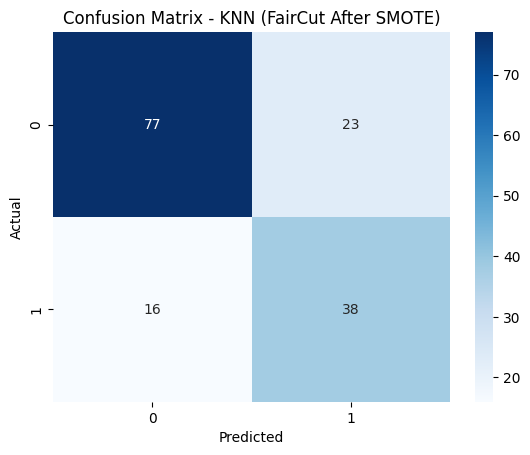

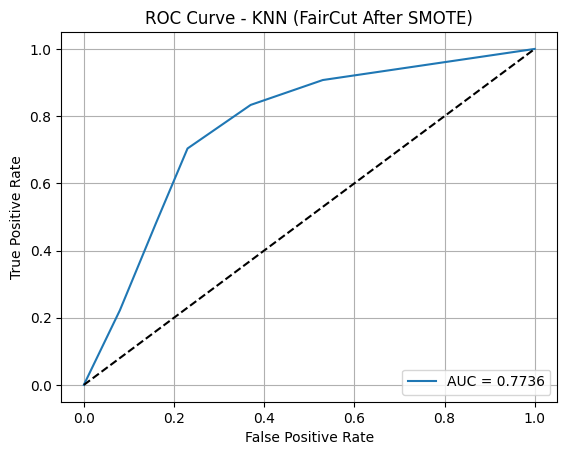

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.62      0.70      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

📊 Key Metrics:
Accuracy:  0.7468
Precision: 0.6230
Recall:    0.7037
F1 Score:  0.6609
ROC AUC:   0.7736

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2963
False Positive Rate (FPR): 0.2300
Balanced Error Rate (BER): 0.2631


In [ ]:
# === KNN: FairCut-Imputed (Before SMOTE) ===
knn_fc = KNeighborsClassifier(n_neighbors=5)
knn_fc.fit(Xf_train_scaled, yf_train)

yf_pred_knn = knn_fc.predict(Xf_test_scaled)
yf_proba_knn = knn_fc.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_knn, yf_proba_knn, model_name="KNN (FairCut Before SMOTE)")

# === KNN: FairCut-Imputed (After SMOTE) ===
knn_fc_smote = KNeighborsClassifier(n_neighbors=5)
knn_fc_smote.fit(Xf_train_res, yf_train_res)

yf_pred_knn_smote = knn_fc_smote.predict(Xf_test_scaled)
yf_proba_knn_smote = knn_fc_smote.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_knn_smote, yf_proba_knn_smote, model_name="KNN (FairCut After SMOTE)")


# Random Forest Model


=== 🔍 Evaluation for: Random Forest (Median Before SMOTE) ===



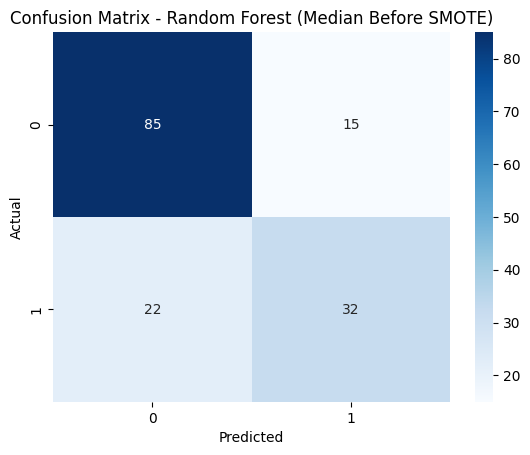

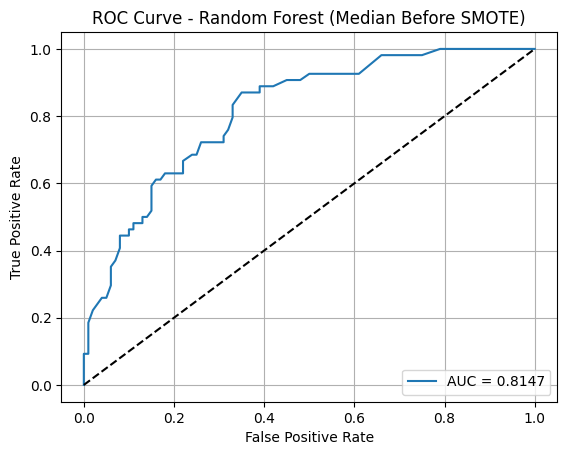

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

📊 Key Metrics:
Accuracy:  0.7597
Precision: 0.6809
Recall:    0.5926
F1 Score:  0.6337
ROC AUC:   0.8147

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4074
False Positive Rate (FPR): 0.1500
Balanced Error Rate (BER): 0.2787

=== 🔍 Evaluation for: Random Forest (Median After SMOTE) ===



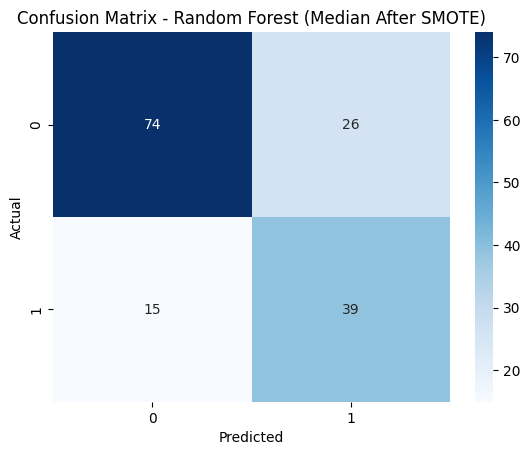

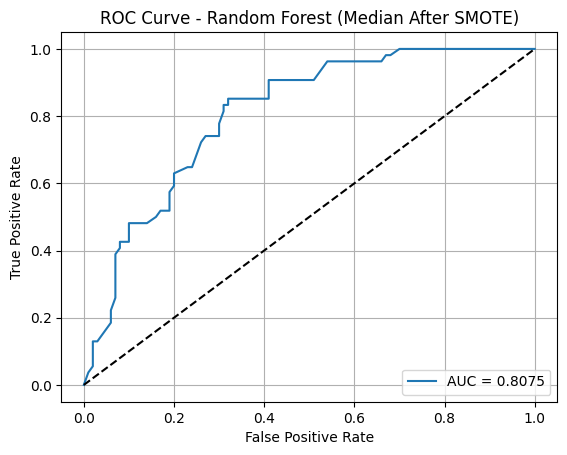

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       100
           1       0.60      0.72      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

📊 Key Metrics:
Accuracy:  0.7338
Precision: 0.6000
Recall:    0.7222
F1 Score:  0.6555
ROC AUC:   0.8075

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2778
False Positive Rate (FPR): 0.2600
Balanced Error Rate (BER): 0.2689


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# === Random Forest: Median-Imputed (Before SMOTE) ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_rf, y_proba_rf, model_name="Random Forest (Median Before SMOTE)")

# === Random Forest: Median-Imputed (After SMOTE) ===
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_res, y_train_res)

y_pred_rf_smote = rf_smote.predict(X_test_scaled)
y_proba_rf_smote = rf_smote.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_rf_smote, y_proba_rf_smote, model_name="Random Forest (Median After SMOTE)")



=== 🔍 Evaluation for: Random Forest (FairCut Before SMOTE) ===



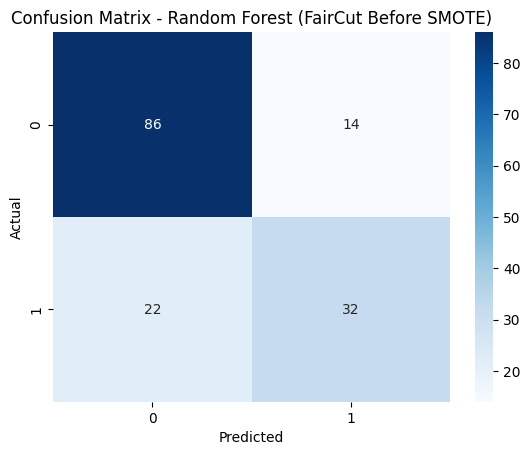

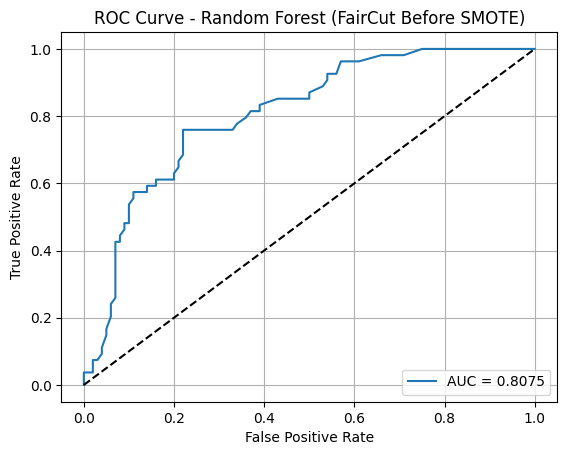

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

📊 Key Metrics:
Accuracy:  0.7662
Precision: 0.6957
Recall:    0.5926
F1 Score:  0.6400
ROC AUC:   0.8075

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4074
False Positive Rate (FPR): 0.1400
Balanced Error Rate (BER): 0.2737

=== 🔍 Evaluation for: Random Forest (FairCut After SMOTE) ===



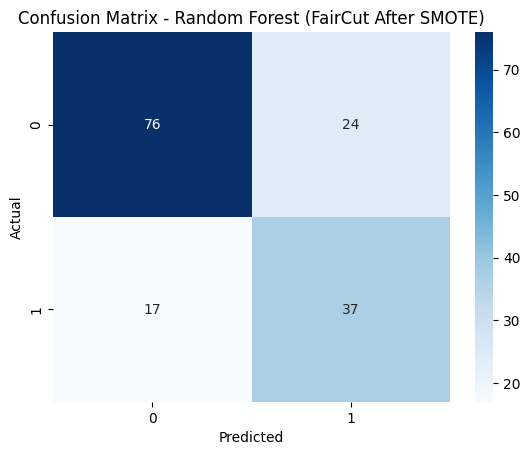

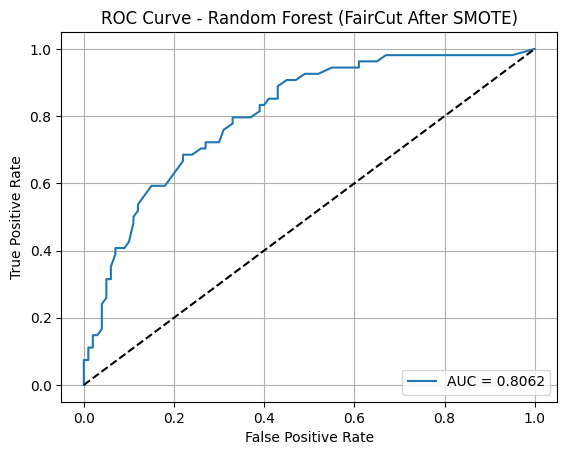

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

📊 Key Metrics:
Accuracy:  0.7338
Precision: 0.6066
Recall:    0.6852
F1 Score:  0.6435
ROC AUC:   0.8062

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3148
False Positive Rate (FPR): 0.2400
Balanced Error Rate (BER): 0.2774


In [ ]:
# === Random Forest: FairCut-Imputed (Before SMOTE) ===
rf_fc = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fc.fit(Xf_train_scaled, yf_train)

yf_pred_rf = rf_fc.predict(Xf_test_scaled)
yf_proba_rf = rf_fc.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_rf, yf_proba_rf, model_name="Random Forest (FairCut Before SMOTE)")

# === Random Forest: FairCut-Imputed (After SMOTE) ===
rf_fc_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fc_smote.fit(Xf_train_res, yf_train_res)

yf_pred_rf_smote = rf_fc_smote.predict(Xf_test_scaled)
yf_proba_rf_smote = rf_fc_smote.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_rf_smote, yf_proba_rf_smote, model_name="Random Forest (FairCut After SMOTE)")


# XG Boost

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:02:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== 🔍 Evaluation for: XGBoost (Median Before SMOTE) ===



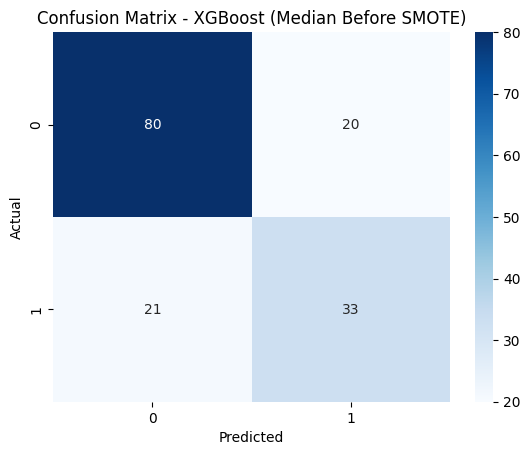

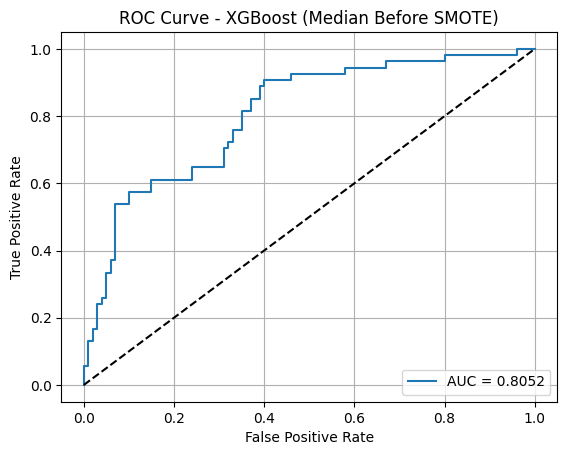

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

📊 Key Metrics:
Accuracy:  0.7338
Precision: 0.6226
Recall:    0.6111
F1 Score:  0.6168
ROC AUC:   0.8052

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3889
False Positive Rate (FPR): 0.2000
Balanced Error Rate (BER): 0.2944


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:02:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== 🔍 Evaluation for: XGBoost (Median After SMOTE) ===



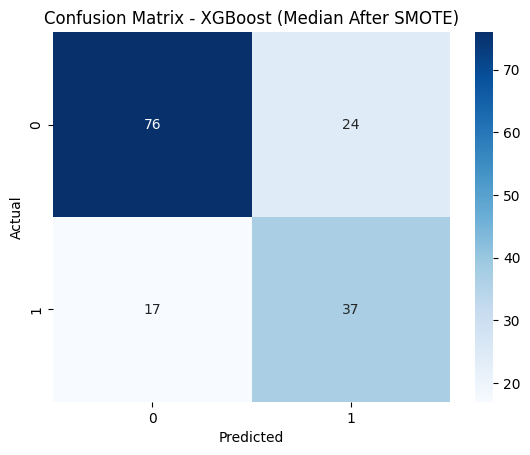

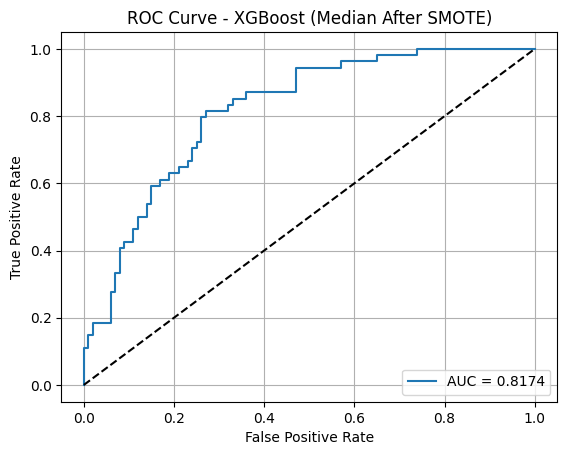

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

📊 Key Metrics:
Accuracy:  0.7338
Precision: 0.6066
Recall:    0.6852
F1 Score:  0.6435
ROC AUC:   0.8174

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3148
False Positive Rate (FPR): 0.2400
Balanced Error Rate (BER): 0.2774


In [ ]:
# === XGBoost: Median-Imputed (Before SMOTE) ===
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_xgb, y_proba_xgb, model_name="XGBoost (Median Before SMOTE)")

# === XGBoost: Median-Imputed (After SMOTE) ===
xgb_smote = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_smote.fit(X_train_res, y_train_res)

y_pred_xgb_smote = xgb_smote.predict(X_test_scaled)
y_proba_xgb_smote = xgb_smote.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_xgb_smote, y_proba_xgb_smote, model_name="XGBoost (Median After SMOTE)")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:03:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== 🔍 Evaluation for: XGBoost (FairCut Before SMOTE) ===



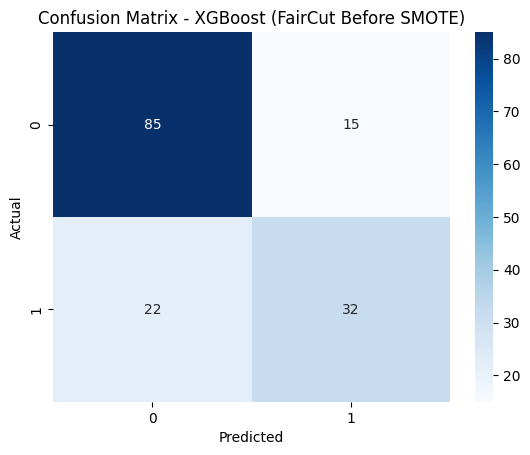

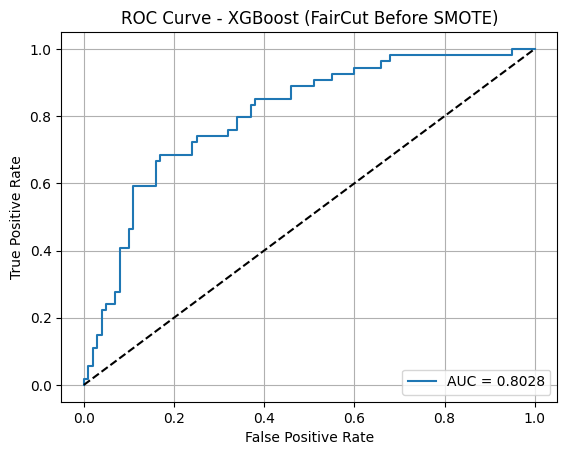

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

📊 Key Metrics:
Accuracy:  0.7597
Precision: 0.6809
Recall:    0.5926
F1 Score:  0.6337
ROC AUC:   0.8028

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4074
False Positive Rate (FPR): 0.1500
Balanced Error Rate (BER): 0.2787


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:03:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== 🔍 Evaluation for: XGBoost (FairCut After SMOTE) ===



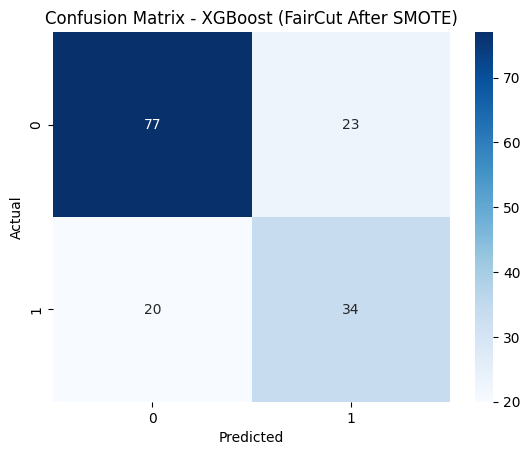

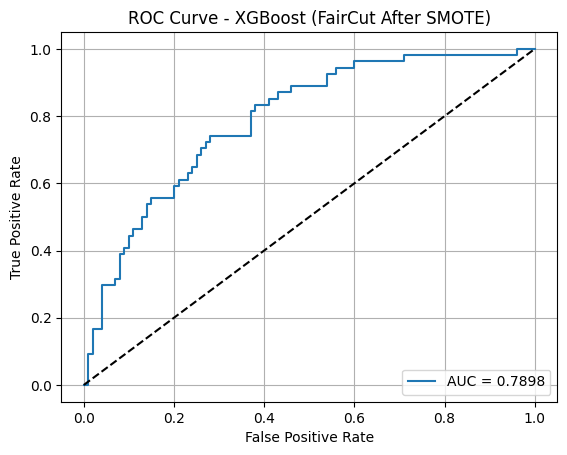

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       100
           1       0.60      0.63      0.61        54

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

📊 Key Metrics:
Accuracy:  0.7208
Precision: 0.5965
Recall:    0.6296
F1 Score:  0.6126
ROC AUC:   0.7898

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3704
False Positive Rate (FPR): 0.2300
Balanced Error Rate (BER): 0.3002


In [ ]:
# === XGBoost: FairCut-Imputed (Before SMOTE) ===
xgb_fc = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_fc.fit(Xf_train_scaled, yf_train)

yf_pred_xgb = xgb_fc.predict(Xf_test_scaled)
yf_proba_xgb = xgb_fc.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_xgb, yf_proba_xgb, model_name="XGBoost (FairCut Before SMOTE)")

# === XGBoost: FairCut-Imputed (After SMOTE) ===
xgb_fc_smote = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_fc_smote.fit(Xf_train_res, yf_train_res)

yf_pred_xgb_smote = xgb_fc_smote.predict(Xf_test_scaled)
yf_proba_xgb_smote = xgb_fc_smote.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_xgb_smote, yf_proba_xgb_smote, model_name="XGBoost (FairCut After SMOTE)")


SHAP shape: (154, 8)
X_test_scaled shape: (154, 8)


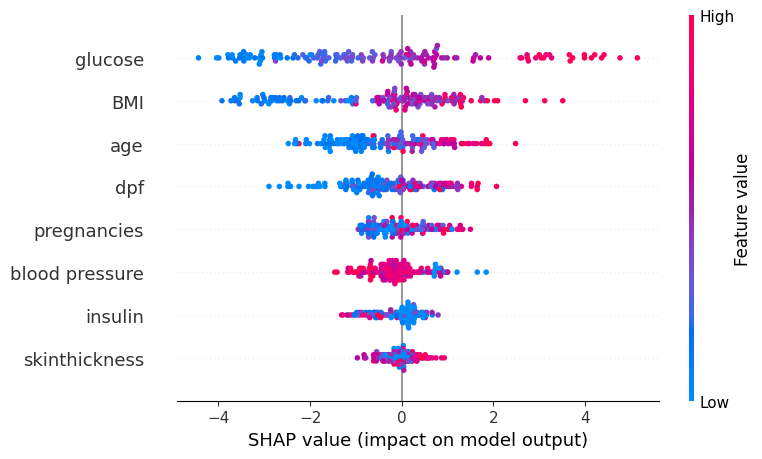

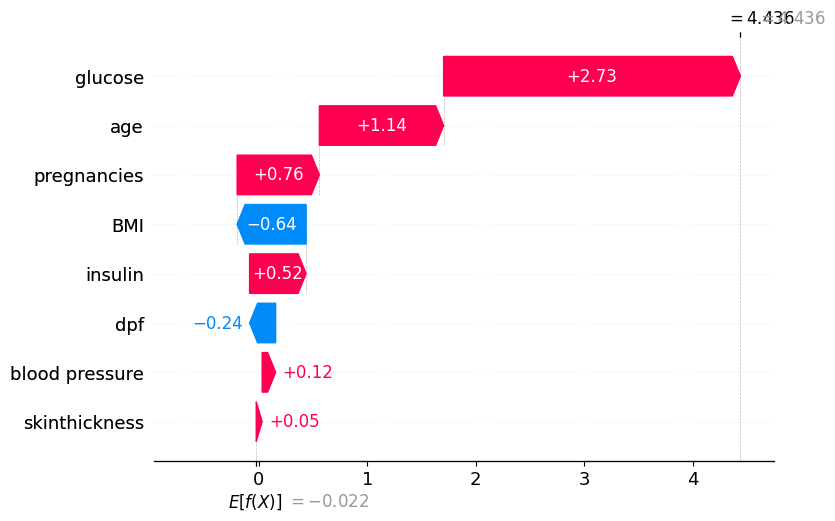

In [ ]:

# === 2. SHAP Tree Explainer
explainer_xgb = shap.TreeExplainer(xgb_smote)
shap_values_xgb = explainer_xgb.shap_values(X_test_scaled, check_additivity=False)

# === 3. Confirm Shape (Expect: (n_samples, n_features))
print("SHAP shape:", shap_values_xgb.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

# === 4. Beeswarm Plot
shap.summary_plot(shap_values_xgb, X_test_scaled, feature_names=X.columns)

# === 5. Waterfall Plot for One Sample
shap.initjs()
shap.plots._waterfall.waterfall_legacy(
    explainer_xgb.expected_value,
    shap_values_xgb[0],
    feature_names=X.columns
)


# Tabular Transformers

In [139]:
!pip install pytorch-tabnet --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 824.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.64462 | train_auc: 0.75173 | train_accuracy: 0.74104 | val_auc: 0.71926 | val_accuracy: 0.7013  |  0:00:00s
epoch 10 | loss: 0.50891 | train_auc: 0.86673 | train_accuracy: 0.77362 | val_auc: 0.81056 | val_accuracy: 0.71429 |  0:00:05s
epoch 20 | loss: 0.49084 | train_auc: 0.86659 | train_accuracy: 0.77199 | val_auc: 0.82278 | val_accuracy: 0.75974 |  0:00:09s
epoch 30 | loss: 0.47644 | train_auc: 0.87141 | train_accuracy: 0.78502 | val_auc: 0.80222 | val_accuracy: 0.73377 |  0:00:12s
epoch 40 | loss: 0.47042 | train_auc: 0.88466 | train_accuracy: 0.79642 | val_auc: 0.81389 | val_accuracy: 0.74675 |  0:00:15s
epoch 50 | loss: 0.45957 | train_auc: 0.88855 | train_accuracy: 0.7899  | val_auc: 0.80648 | val_accuracy: 0.74026 |  0:00:18s

Early stopping occurred at epoch 58 with best_epoch = 28 and best_val_accuracy = 0.77922

=== 🔍 Evaluation for: TabNet (FairCut Before SMOTE) ===



/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


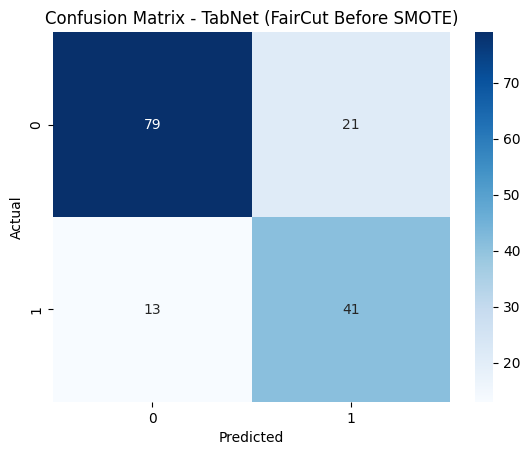

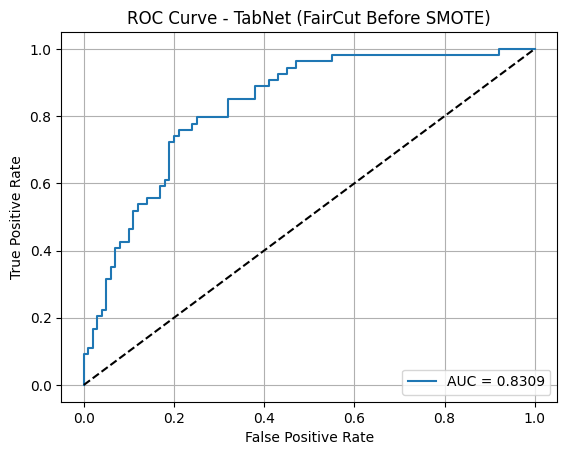

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       100
           1       0.66      0.76      0.71        54

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154

📊 Key Metrics:
Accuracy:  0.7792
Precision: 0.6613
Recall:    0.7593
F1 Score:  0.7069
ROC AUC:   0.8309

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2407
False Positive Rate (FPR): 0.2100
Balanced Error Rate (BER): 0.2254


In [140]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# === Prepare data ===
X_train_tab = Xf_train_scaled.astype(np.float32)
X_test_tab = Xf_test_scaled.astype(np.float32)
y_train_tab = np.array(yf_train).astype(int)
y_test_tab = np.array(yf_test).astype(int)

# === Class weights ===
weights_before = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_tab), y=y_train_tab)
weights_before_tensor = torch.tensor(weights_before, dtype=torch.float32)

# === Define TabNet ===
tabnet_fc_before = TabNetClassifier(
    n_d=8, n_a=8, n_steps=3,
    gamma=1.3,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    scheduler_params={"step_size": 10, "gamma": 0.9},
    mask_type='entmax',
    seed=42,
    verbose=10
)

# === Train ===
tabnet_fc_before.fit(
    X_train=X_train_tab, y_train=y_train_tab,
    eval_set=[(X_train_tab, y_train_tab), (X_test_tab, y_test_tab)],
    eval_name=['train', 'val'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=200,
    patience=30,
    batch_size=64,
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False,
    loss_fn=torch.nn.CrossEntropyLoss(weight=weights_before_tensor)
)

# === Predict and Evaluate ===
y_pred_before = tabnet_fc_before.predict(X_test_tab)
y_proba_before = tabnet_fc_before.predict_proba(X_test_tab)[:, 1]

evaluate_model(y_test_tab, y_pred_before, y_proba_before, model_name="TabNet (FairCut Before SMOTE)")


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.6804  | train_auc: 0.81997 | train_accuracy: 0.75125 | val_auc: 0.74759 | val_accuracy: 0.69481 |  0:00:00s
epoch 10 | loss: 0.46846 | train_auc: 0.87231 | train_accuracy: 0.7675  | val_auc: 0.79852 | val_accuracy: 0.70779 |  0:00:03s
epoch 20 | loss: 0.47701 | train_auc: 0.88802 | train_accuracy: 0.79375 | val_auc: 0.80111 | val_accuracy: 0.68831 |  0:00:06s
epoch 30 | loss: 0.47706 | train_auc: 0.88725 | train_accuracy: 0.8     | val_auc: 0.78907 | val_accuracy: 0.68831 |  0:00:13s
epoch 40 | loss: 0.4658  | train_auc: 0.89462 | train_accuracy: 0.81125 | val_auc: 0.80556 | val_accuracy: 0.73377 |  0:00:20s
epoch 50 | loss: 0.447   | train_auc: 0.91273 | train_accuracy: 0.83125 | val_auc: 0.8237  | val_accuracy: 0.77922 |  0:00:24s
epoch 60 | loss: 0.44026 | train_auc: 0.91343 | train_accuracy: 0.8275  | val_auc: 0.8137  | val_accuracy: 0.75974 |  0:00:26s
epoch 70 | loss: 0.43445 | train_auc: 0.92365 | train_accuracy: 0.84625 | val_auc: 0.80463 | val_accuracy: 0.75

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


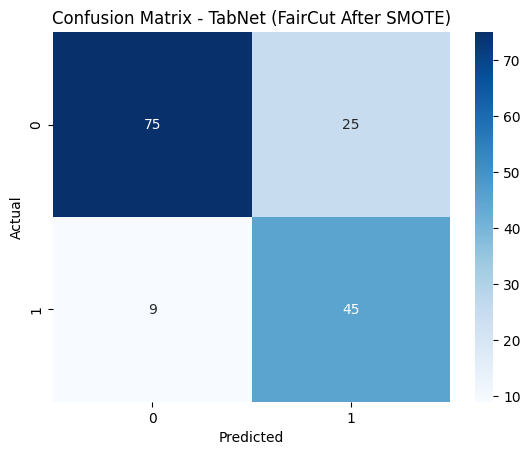

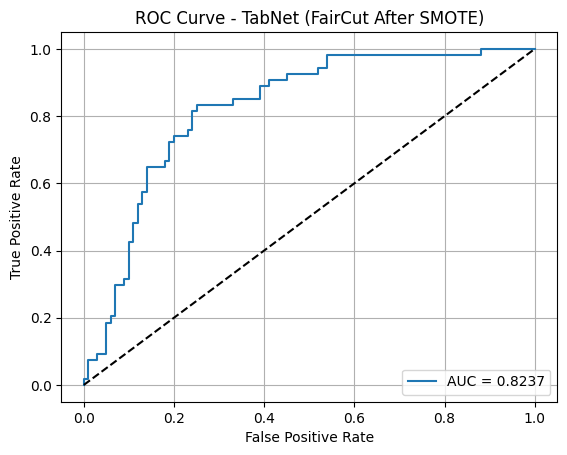

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       100
           1       0.64      0.83      0.73        54

    accuracy                           0.78       154
   macro avg       0.77      0.79      0.77       154
weighted avg       0.81      0.78      0.78       154

📊 Key Metrics:
Accuracy:  0.7792
Precision: 0.6429
Recall:    0.8333
F1 Score:  0.7258
ROC AUC:   0.8237

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.1667
False Positive Rate (FPR): 0.2500
Balanced Error Rate (BER): 0.2083


In [141]:
# === Prepare data ===
X_train_tab_res = Xf_train_res.astype(np.float32)
X_test_tab = Xf_test_scaled.astype(np.float32)
y_train_tab_res = np.array(yf_train_res).astype(int)
y_test_tab = np.array(yf_test).astype(int)

# === Class weights ===
weights_after = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_tab_res), y=y_train_tab_res)
weights_after_tensor = torch.tensor(weights_after, dtype=torch.float32)

# === Define TabNet ===
tabnet_fc_after = TabNetClassifier(
    n_d=8, n_a=8, n_steps=3,
    gamma=1.3,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    scheduler_params={"step_size": 10, "gamma": 0.9},
    mask_type='entmax',
    seed=42,
    verbose=10
)

# === Train ===
tabnet_fc_after.fit(
    X_train=X_train_tab_res, y_train=y_train_tab_res,
    eval_set=[(X_train_tab_res, y_train_tab_res), (X_test_tab, y_test_tab)],
    eval_name=['train', 'val'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=200,
    patience=30,
    batch_size=64,
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False,
    loss_fn=torch.nn.CrossEntropyLoss(weight=weights_after_tensor)
)

# === Predict and Evaluate ===
y_pred_after = tabnet_fc_after.predict(X_test_tab)
y_proba_after = tabnet_fc_after.predict_proba(X_test_tab)[:, 1]

evaluate_model(y_test_tab, y_pred_after, y_proba_after, model_name="TabNet (FairCut After SMOTE)")


In [142]:
import matplotlib.pyplot as plt
import numpy as np

def plot_tabnet_feature_importance(model, feature_names, title="TabNet Feature Importances"):
    """
    Plot global feature importances from a trained TabNetClassifier.

    Parameters:
    - model: trained TabNetClassifier object
    - feature_names: list of strings for feature names (must match order used in training)
    - title: optional title for the plot
    """
    try:
        importances = model.feature_importances_
    except AttributeError:
        raise ValueError("Model must be a trained TabNetClassifier with feature_importances_ attribute.")

    if len(importances) != len(feature_names):
        raise ValueError("Length of feature_names must match number of features used to train the model.")

    sorted_idx = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
    plt.title(title)
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()


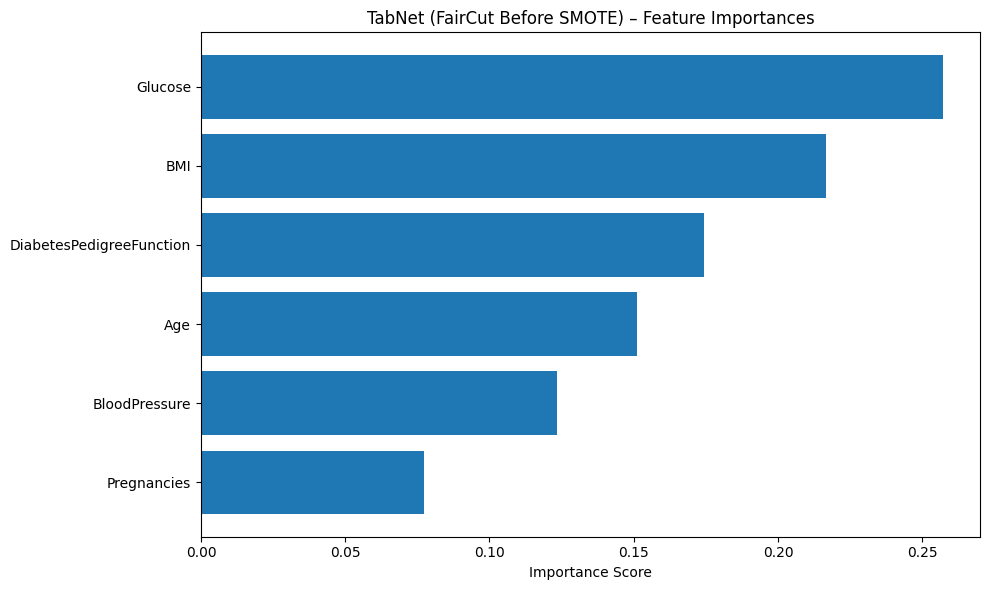

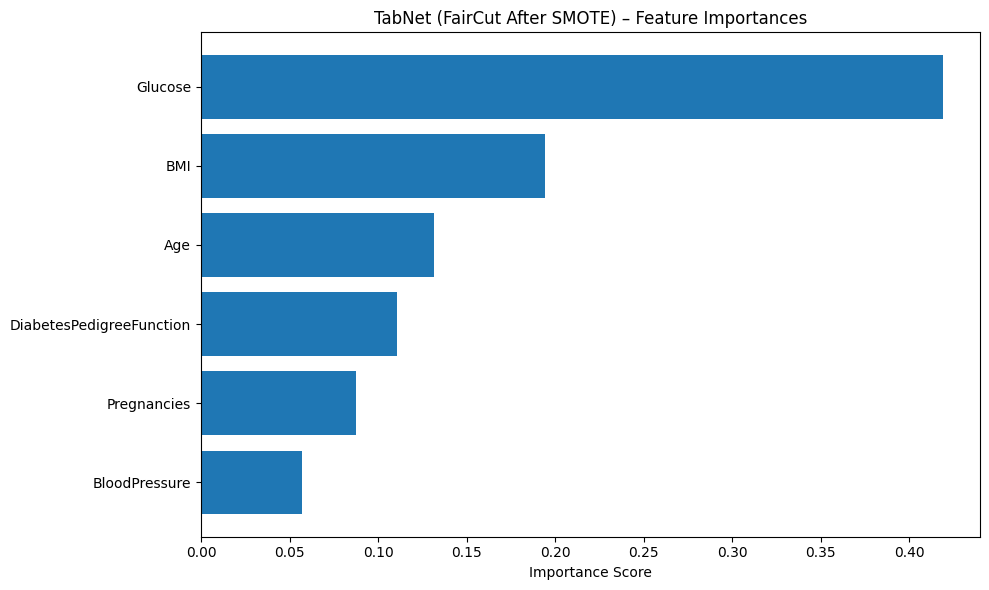

In [143]:
# For FairCut Imputed Before SMOTE
plot_tabnet_feature_importance(
    model=tabnet_fc_before,
    feature_names=['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction'],
    title="TabNet (FairCut Before SMOTE) – Feature Importances"
)

# For FairCut Imputed After SMOTE
plot_tabnet_feature_importance(
    model=tabnet_fc_after,
    feature_names=['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction'],
    title="TabNet (FairCut After SMOTE) – Feature Importances"
)


In [144]:
!pip install optuna --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 12.7 MB/s eta 0:00:00


In [145]:
import optuna
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import roc_auc_score
import torch

def objective(trial):
    # Sample hyperparameters
    n_d = trial.suggest_categorical("n_d", [8, 16, 24, 32])
    n_a = trial.suggest_categorical("n_a", [8, 16, 24, 32])
    n_steps = trial.suggest_int("n_steps", 3, 7)
    gamma = trial.suggest_float("gamma", 1.0, 2.0)
    lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
    lr = trial.suggest_float("lr", 0.005, 0.03)

    # Build model
    model = TabNetClassifier(
        n_d=n_d,
        n_a=n_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        optimizer_fn=torch.optim.Adam,
        optimizer_params={"lr": lr},
        mask_type='entmax',
        seed=42,
        verbose=0
    )

    # Train model
    model.fit(
        X_train=Xf_train_scaled, y_train=yf_train.values,
        eval_set=[(Xf_test_scaled, yf_test.values)],
        eval_name=["val"],
        eval_metric=["auc"],
        max_epochs=150,
        patience=20,
        batch_size=64,
        virtual_batch_size=16,
        num_workers=0,
        drop_last=False,
        loss_fn=torch.nn.CrossEntropyLoss()
    )

    # Evaluate on test set
    preds = model.predict_proba(Xf_test_scaled)[:, 1]
    auc = roc_auc_score(yf_test, preds)
    return auc


In [ ]:
study = optuna.create_study(direction="maximize", study_name="TabNet_Tuning")
study.optimize(objective, n_trials=30)  # ⏱ adjust trials as needed


[I 2025-08-07 20:19:36,698] A new study created in memory with name: TabNet_Tuning
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:20:20,311] Trial 0 finished with value: 0.8331481481481481 and parameters: {'n_d': 16, 'n_a': 24, 'n_steps': 7, 'gamma': 1.7312302203232228, 'lambda_sparse': 2.4674656745834857e-05, 'lr': 0.01590841151530078}. Best is trial 0 with value: 0.8331481481481481.



Early stopping occurred at epoch 59 with best_epoch = 39 and best_val_auc = 0.83315


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:20:34,847] Trial 1 finished with value: 0.8233333333333334 and parameters: {'n_d': 32, 'n_a': 24, 'n_steps': 5, 'gamma': 1.4452225242837868, 'lambda_sparse': 2.745208157287793e-05, 'lr': 0.02354993546813577}. Best is trial 0 with value: 0.8331481481481481.



Early stopping occurred at epoch 48 with best_epoch = 28 and best_val_auc = 0.82333


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:20:44,740] Trial 2 finished with value: 0.8148148148148148 and parameters: {'n_d': 32, 'n_a': 24, 'n_steps': 4, 'gamma': 1.9238960329283412, 'lambda_sparse': 4.319649870835859e-06, 'lr': 0.014262000524420719}. Best is trial 0 with value: 0.8331481481481481.



Early stopping occurred at epoch 37 with best_epoch = 17 and best_val_auc = 0.81481


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:20:58,645] Trial 3 finished with value: 0.8301851851851851 and parameters: {'n_d': 24, 'n_a': 8, 'n_steps': 7, 'gamma': 1.4128236309182731, 'lambda_sparse': 0.0002532801927616141, 'lr': 0.008647318106386312}. Best is trial 0 with value: 0.8331481481481481.



Early stopping occurred at epoch 35 with best_epoch = 15 and best_val_auc = 0.83019


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:21:18,974] Trial 4 finished with value: 0.8283333333333333 and parameters: {'n_d': 32, 'n_a': 16, 'n_steps': 7, 'gamma': 1.9831457237080814, 'lambda_sparse': 2.5526396071395382e-06, 'lr': 0.022317408184774592}. Best is trial 0 with value: 0.8331481481481481.



Early stopping occurred at epoch 49 with best_epoch = 29 and best_val_auc = 0.82833


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:21:32,657] Trial 5 finished with value: 0.8370370370370371 and parameters: {'n_d': 24, 'n_a': 16, 'n_steps': 7, 'gamma': 1.4876861449583836, 'lambda_sparse': 1.7817439280472362e-06, 'lr': 0.015322602721150626}. Best is trial 5 with value: 0.8370370370370371.



Early stopping occurred at epoch 34 with best_epoch = 14 and best_val_auc = 0.83704


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:21:57,588] Trial 6 finished with value: 0.8492592592592593 and parameters: {'n_d': 32, 'n_a': 32, 'n_steps': 3, 'gamma': 1.5170310187139453, 'lambda_sparse': 1.6851490404031921e-06, 'lr': 0.01527223576164231}. Best is trial 6 with value: 0.8492592592592593.



Early stopping occurred at epoch 117 with best_epoch = 97 and best_val_auc = 0.84926


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:22:21,158] Trial 7 finished with value: 0.852037037037037 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 6, 'gamma': 1.3833902786800913, 'lambda_sparse': 1.5089047960921195e-05, 'lr': 0.013217464641018788}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 69 with best_epoch = 49 and best_val_auc = 0.85204


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:22:36,156] Trial 8 finished with value: 0.8307407407407407 and parameters: {'n_d': 24, 'n_a': 32, 'n_steps': 5, 'gamma': 1.6435113650668158, 'lambda_sparse': 1.90918916948995e-05, 'lr': 0.027314686384860086}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 48 with best_epoch = 28 and best_val_auc = 0.83074


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:22:52,530] Trial 9 finished with value: 0.8324074074074074 and parameters: {'n_d': 32, 'n_a': 16, 'n_steps': 5, 'gamma': 1.320579261801345, 'lambda_sparse': 5.199069739941558e-05, 'lr': 0.015925556338944567}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 56 with best_epoch = 36 and best_val_auc = 0.83241


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:23:07,638] Trial 10 finished with value: 0.8248148148148148 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 6, 'gamma': 1.0089306880471316, 'lambda_sparse': 0.0007439083272148565, 'lr': 0.005557094636977536}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 44 with best_epoch = 24 and best_val_auc = 0.82481


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:23:19,758] Trial 11 finished with value: 0.8390740740740741 and parameters: {'n_d': 8, 'n_a': 32, 'n_steps': 3, 'gamma': 1.2557975903573488, 'lambda_sparse': 6.235928852051952e-06, 'lr': 0.011553338292273639}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 61 with best_epoch = 41 and best_val_auc = 0.83907


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:23:27,501] Trial 12 finished with value: 0.830925925925926 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 3, 'gamma': 1.1530426884165363, 'lambda_sparse': 1.3874425008413124e-06, 'lr': 0.020684665092003198}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 41 with best_epoch = 21 and best_val_auc = 0.83093


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:23:39,595] Trial 13 finished with value: 0.8211111111111111 and parameters: {'n_d': 8, 'n_a': 32, 'n_steps': 4, 'gamma': 1.666271879600037, 'lambda_sparse': 7.327889084815669e-06, 'lr': 0.01129905031432589}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 43 with best_epoch = 23 and best_val_auc = 0.82111


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 51 with best_epoch = 31 and best_val_auc = 0.83019


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:24:02,157] Trial 14 finished with value: 0.8301851851851851 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 6, 'gamma': 1.589798768186723, 'lambda_sparse': 0.00010732275589092071, 'lr': 0.01883297264917555}. Best is trial 7 with value: 0.852037037037037.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:24:12,607] Trial 15 finished with value: 0.8212962962962963 and para


Early stopping occurred at epoch 24 with best_epoch = 4 and best_val_auc = 0.8213


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:24:21,746] Trial 16 finished with value: 0.8242592592592592 and parameters: {'n_d': 16, 'n_a': 32, 'n_steps': 4, 'gamma': 1.8046226031434305, 'lambda_sparse': 1.1320646574357836e-06, 'lr': 0.007657871109673553}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 36 with best_epoch = 16 and best_val_auc = 0.82426


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:24:30,319] Trial 17 finished with value: 0.8038888888888889 and parameters: {'n_d': 8, 'n_a': 8, 'n_steps': 3, 'gamma': 1.1396747289331657, 'lambda_sparse': 7.633642193669684e-05, 'lr': 0.01869811111485571}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 44 with best_epoch = 24 and best_val_auc = 0.80389


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:24:39,338] Trial 18 finished with value: 0.8446296296296296 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 6, 'gamma': 1.5356814100793394, 'lambda_sparse': 3.47965540147488e-06, 'lr': 0.025397811937836356}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 26 with best_epoch = 6 and best_val_auc = 0.84463


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:24:45,560] Trial 19 finished with value: 0.8211111111111111 and parameters: {'n_d': 32, 'n_a': 32, 'n_steps': 4, 'gamma': 1.4014939335761758, 'lambda_sparse': 1.2591612852394704e-05, 'lr': 0.029967495205322207}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 24 with best_epoch = 4 and best_val_auc = 0.82111


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:24:56,231] Trial 20 finished with value: 0.8283333333333335 and parameters: {'n_d': 32, 'n_a': 32, 'n_steps': 5, 'gamma': 1.7721612976594945, 'lambda_sparse': 0.00039356097636626165, 'lr': 0.013541040022042983}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 34 with best_epoch = 14 and best_val_auc = 0.82833


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:25:10,172] Trial 21 finished with value: 0.8305555555555555 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 6, 'gamma': 1.5604353082505344, 'lambda_sparse': 3.2063529108729475e-06, 'lr': 0.02401132373396032}. Best is trial 7 with value: 0.852037037037037.



Early stopping occurred at epoch 42 with best_epoch = 22 and best_val_auc = 0.83056


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:25:31,973] Trial 22 finished with value: 0.8525925925925926 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 6, 'gamma': 1.5401745990878606, 'lambda_sparse': 4.2632434383024834e-06, 'lr': 0.017834974897773404}. Best is trial 22 with value: 0.8525925925925926.



Early stopping occurred at epoch 66 with best_epoch = 46 and best_val_auc = 0.85259


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:25:44,258] Trial 23 finished with value: 0.8459259259259259 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 6, 'gamma': 1.3558280588572542, 'lambda_sparse': 7.167321708246183e-06, 'lr': 0.017297435307922007}. Best is trial 22 with value: 0.8525925925925926.



Early stopping occurred at epoch 36 with best_epoch = 16 and best_val_auc = 0.84593


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:25:52,689] Trial 24 finished with value: 0.8255555555555556 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 5, 'gamma': 1.218298860606153, 'lambda_sparse': 1.9502962519265027e-06, 'lr': 0.019696301959352486}. Best is trial 22 with value: 0.8525925925925926.



Early stopping occurred at epoch 28 with best_epoch = 8 and best_val_auc = 0.82556


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:26:16,465] Trial 25 finished with value: 0.8162962962962963 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 6, 'gamma': 1.4908605414475193, 'lambda_sparse': 1.3195307580156587e-05, 'lr': 0.00959722235826167}. Best is trial 22 with value: 0.8525925925925926.



Early stopping occurred at epoch 69 with best_epoch = 49 and best_val_auc = 0.8163


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-07 20:26:35,752] Trial 26 finished with value: 0.8305555555555555 and parameters: {'n_d': 8, 'n_a': 24, 'n_steps': 5, 'gamma': 1.630979779641603, 'lambda_sparse': 1.00475009506547e-06, 'lr': 0.01728777803291177}. Best is trial 22 with value: 0.8525925925925926.



Early stopping occurred at epoch 66 with best_epoch = 46 and best_val_auc = 0.83056


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)


In [ ]:
print(" Best AUC:", study.best_value)
print(" Best Params:")
for k, v in study.best_params.items():
    print(f"{k}: {v}")


In [ ]:
best_params = study.best_params

tabnet_tuned = TabNetClassifier(
    **best_params,
    optimizer_fn=torch.optim.Adam,
    optimizer_params={"lr": best_params['lr']},
    mask_type='entmax',
    seed=42,
    verbose=10
)

tabnet_tuned.fit(
    X_train=Xf_train_scaled, y_train=yf_train.values,
    eval_set=[(Xf_train_scaled, yf_train.values), (Xf_test_scaled, yf_test.values)],
    eval_name=['train', 'val'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=200,
    patience=30,
    batch_size=64,
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False,
    loss_fn=torch.nn.CrossEntropyLoss()
)
